In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


### To commemorate the ongoing ICC Cricket World Cup we will exploring a Cricket Dataset and see how we can gain interesting insights using the Data Science Skills we have!

### Use of For loops to traverse the DATASET is not allowed!

**Question 1** Read the dataset `cricket_data.csv` and store it in a variable `cricketData`

In [2]:
cricketData = pd.read_csv("cricket_data.csv")
cricketData

,id,season,city,date,team1,team2,tosswinner,tossdecision,result,dlapplied,winner,winbyruns,winbywickets,playerofmatch,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99 runs,0 wickets,Ahmad SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48 runs,0 wickets,Ahmad WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86 runs,0 wickets,Ahmad IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0 runs,5 wickets,Ahmad Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0 runs,0 wickets,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,65634,2002/03,Sydney,2003/01/09,Sri Lanka,Australia,Australia,field,normal,0,Sri Lanka,79 runs,0 wickets,Ahmad ST Jayasuriya,Sydney Cricket Ground,RB Tiffin,SJA Taufel,DB Hair
2375,64817,2002/03,Wellington,2003/01/08,New Zealand,India,New Zealand,bat,normal,0,India,0 runs,2 wickets,Ahmad Z Khan,"Westpac Stadium, Wellington",BF Bowden,DJ Harper,DB Cowie
2376,64816,2002/03,Queenstown,2003/01/04,India,New Zealand,New Zealand,field,normal,0,New Zealand,0 runs,7 wickets,Ahmad AR Adams,"Davies Park, Queenstown",EAR de Silva,DB Cowie,AL Hill
2377,64815,2002/03,Christchurch,2003/01/01,India,New Zealand,India,bat,normal,0,New Zealand,0 runs,5 wickets,Ahmad DR Tuffey,"Jade Stadium, Christchurch",EAR de Silva,DB Cowie,AL Hill


**Question 2** We all know that Null values are a huge problem. Therefore, we shall begin our data cleaning process by removing all the rows that contain Null values. First store the number of null values in a variable called `numOfNullVals` and then remove them from `cricketData`.

In [3]:
numOfNullVals = cricketData.isnull().sum().sum()
cricketData.dropna(inplace=True)
cricketData.head()

,id,season,city,date,team1,team2,tosswinner,tossdecision,result,dlapplied,winner,winbyruns,winbywickets,playerofmatch,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99 runs,0 wickets,Ahmad SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48 runs,0 wickets,Ahmad WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86 runs,0 wickets,Ahmad IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0 runs,5 wickets,Ahmad Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0 runs,10 wickets,Ahmad Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney


**Question 3** You may have observed the game ids are now just a mix since we have dropped the null valued rows. Write a code snippet that will reset the index and start it from 1 onwards till the length of the dataframe. Rename the new index "Match ID".

In [4]:
cricketData.reset_index(inplace=True)
cricketData.rename(columns={"index":"Match ID"}, inplace=True)
cricketData.head()

,Match ID,id,season,city,date,team1,team2,tosswinner,tossdecision,result,dlapplied,winner,winbyruns,winbywickets,playerofmatch,venue,umpire1,umpire2,umpire3
0,0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99 runs,0 wickets,Ahmad SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48 runs,0 wickets,Ahmad WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86 runs,0 wickets,Ahmad IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0 runs,5 wickets,Ahmad Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0 runs,10 wickets,Ahmad Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney


**Question 4** Another important part of EDA is to make data usable. For example, the `season` column contains strings of the form '2023' or '2023/24', etc.; these as integers would open them up for further analysis. Therefore, change the values in this column to integers (all seasons of the form 2023/24 should be considered as 2024 and so on).

In [5]:
cricketData['season'] = cricketData['season'].apply(lambda x: int("20" + x.split('/')[1]) if '/' in x else int(x))
cricketData.head()

,Match ID,id,season,city,date,team1,team2,tosswinner,tossdecision,result,dlapplied,winner,winbyruns,winbywickets,playerofmatch,venue,umpire1,umpire2,umpire3
0,0,1389389,2024,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99 runs,0 wickets,Ahmad SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48 runs,0 wickets,Ahmad WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86 runs,0 wickets,Ahmad IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,3,1389388,2024,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0 runs,5 wickets,Ahmad Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0 runs,10 wickets,Ahmad Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney


**Question 5** Now we shall rename our columns so they make sense; all of them should be renamed to camel-case format. (e.g, tossdecision -> TossDecision)

In [6]:
!pip install wordninja

In [7]:
import wordninja
def camel_case(word):
    words = wordninja.split(word)  # Split concatenated words
    return ''.join(w.capitalize() for w in words)


In [8]:
cricketData.columns = cricketData.apply(lambda x: camel_case(x.name))
cricketData.head()

,MatchId,Id,Season,City,Date,Team1,Team2,TossWinner,TossDecision,Result,DlApplied,Winner,WinByRuns,WinByWickets,PlayerOfMatch,Venue,Umpire1,Umpire2,Umpire3
0,0,1389389,2024,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99 runs,0 wickets,Ahmad SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48 runs,0 wickets,Ahmad WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86 runs,0 wickets,Ahmad IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,3,1389388,2024,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0 runs,5 wickets,Ahmad Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0 runs,10 wickets,Ahmad Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney


**Question 6** Finally, have a look at the 'PlayerOfMatch' column and see if you spot a problem. If so, fix it.

In [9]:
cricketData['PlayerOfMatch'] = cricketData['PlayerOfMatch'].apply(lambda x: x.replace('Ahmad', ''))
cricketData.head()

,MatchId,Id,Season,City,Date,Team1,Team2,TossWinner,TossDecision,Result,DlApplied,Winner,WinByRuns,WinByWickets,PlayerOfMatch,Venue,Umpire1,Umpire2,Umpire3
0,0,1389389,2024,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99 runs,0 wickets,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48 runs,0 wickets,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86 runs,0 wickets,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,3,1389388,2024,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0 runs,5 wickets,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0 runs,10 wickets,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney


## Moving on to Visualisation

### Another important part of EDA is to be able to visualize the Data and get a deeper understanding of the relationships within the Data.

**Question 7** First we will find out the number of wins for each team. Start by creating a dictionary called `TeamWins` where the key will be the team name and the value will be the corresponding number of wins that team has. Then plot this to be able to visualize, you must justify whichever plot type you choose. (For this question, leave out any team that has no wins)

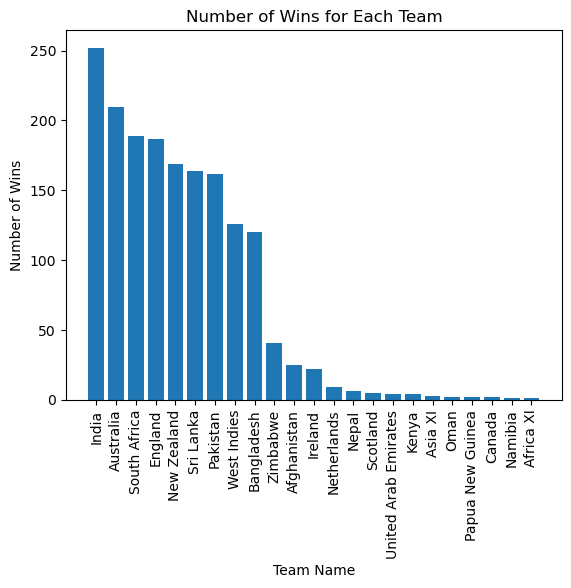

In [10]:
TeamWins = cricketData['Winner'].value_counts().to_dict()
plt.bar(TeamWins.keys(), TeamWins.values())
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Each Team')
plt.xticks(rotation=90)
plt.show()

# I chose bar plot because it is useful to interpret two variables if one of them is categorical and other one is numerical.

**Question 8** Next let's move on to investigate the relationship between winning the toss and winning the match, just like before create a dictionary that has the team name as key, and the probability of winning the match given the team have won the toss as value (make sure to sort it in alphabetic order of team name). Then plot your results; justify the choice of plot. (For this question, you must decide whether all teams should be included or not)

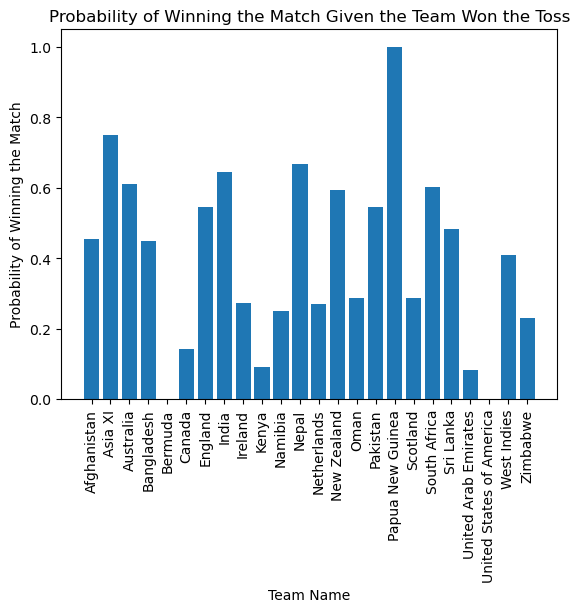

In [11]:
Probabilities = cricketData.groupby('TossWinner').apply(lambda x: (x['Winner'] == x['TossWinner']).mean()).sort_index().to_dict();
plt.bar(Probabilities.keys(), Probabilities.values());
plt.xlabel('Team Name');
plt.ylabel('Probability of Winning the Match');
plt.title('Probability of Winning the Match Given the Team Won the Toss');
plt.xticks(rotation=90);
plt.show();
# I chose bar plot because it is useful to interpret easily two variables if one of them is categorical and other one is numerical.

**Question 9** After doing a visual analysis, what team looks like it is the best team out of all? Save it's name in a variable called `BestTeam`. Is this a valid conclusion? Why or why not?


In [12]:
BestTeam = max(Probabilities, key=Probabilities.get)
BestTeam
# It is not a valid conclusion because there are the teams that have not taken part in the international matches too much and the ratio between these teams and the teams who played international matches consecutively throughout is imbalanced.

'Papua New Guinea'

**Question 10** Let's modify our approach slightly and see if we can see who the actual top teams are. We will only look at teams with more than 100 wins. Start by creating a list of team names called `topTeamList` that have wins > 100, then use that to create a dataframe called `topTeamsMatches`, in which you will have matches for ONLY the top teams (the matches they have played).

In [13]:
topTeamList = cricketData['Winner'].value_counts()[cricketData['Winner'].value_counts() > 100].index.tolist()
topTeamsMatches = cricketData[cricketData['Winner'].isin(topTeamList)]
topTeamsMatches

,MatchId,Id,Season,City,Date,Team1,Team2,TossWinner,TossDecision,Result,DlApplied,Winner,WinByRuns,WinByWickets,PlayerOfMatch,Venue,Umpire1,Umpire2,Umpire3
0,0,1389389,2024,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99 runs,0 wickets,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48 runs,0 wickets,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86 runs,0 wickets,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,3,1389388,2024,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0 runs,5 wickets,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0 runs,10 wickets,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,2374,65634,2003,Sydney,2003/01/09,Sri Lanka,Australia,Australia,field,normal,0,Sri Lanka,79 runs,0 wickets,ST Jayasuriya,Sydney Cricket Ground,RB Tiffin,SJA Taufel,DB Hair
1702,2375,64817,2003,Wellington,2003/01/08,New Zealand,India,New Zealand,bat,normal,0,India,0 runs,2 wickets,Z Khan,"Westpac Stadium, Wellington",BF Bowden,DJ Harper,DB Cowie
1703,2376,64816,2003,Queenstown,2003/01/04,India,New Zealand,New Zealand,field,normal,0,New Zealand,0 runs,7 wickets,AR Adams,"Davies Park, Queenstown",EAR de Silva,DB Cowie,AL Hill
1704,2377,64815,2003,Christchurch,2003/01/01,India,New Zealand,India,bat,normal,0,New Zealand,0 runs,5 wickets,DR Tuffey,"Jade Stadium, Christchurch",EAR de Silva,DB Cowie,AL Hill


**Question 11** Now that we have the 'Good' teams, let us see which ones are statistically better that others. Find the win rate of each good team, store it in a dictionary like you have been doing before. Name it `topTeamsWinRate`. Plot this information and now comment on who might be the top team (store the name in `actualBestTeam`) and whether this is a better comparison than what we did before.

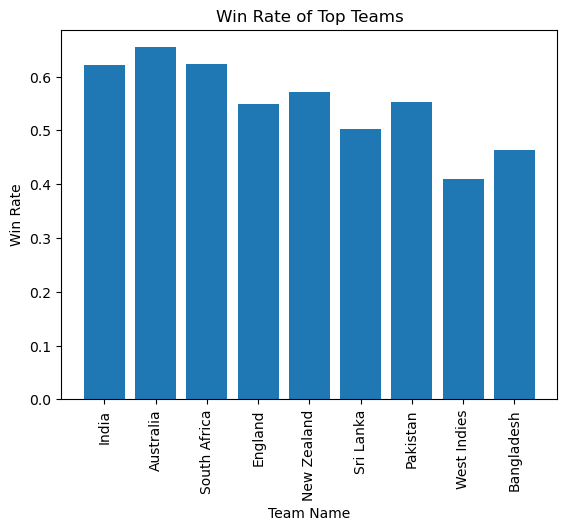

'Australia'

In [14]:
TotalMatches = pd.concat([topTeamsMatches['Team1'], topTeamsMatches['Team2']]).value_counts()
TotalWins = topTeamsMatches['Winner'].value_counts()

topTeamsWinRate =  (TotalWins / TotalMatches[topTeamsMatches['Winner'].value_counts().index]).to_dict()
plt.bar(topTeamsWinRate.keys(), topTeamsWinRate.values())
plt.xlabel('Team Name')
plt.ylabel('Win Rate')
plt.title('Win Rate of Top Teams')
plt.xticks(rotation=90)
plt.show()

actualBestTeam = max(topTeamsWinRate, key=topTeamsWinRate.get)
actualBestTeam
# Yes, it is a better comparison because we only selected those teams who played enough matches to be taken into account for a valid and fair comparison.

### Warning: Use for topTeamsMatches ends here

## Pakistan vs India

**Question 12** We all know Pakistan is the superior team, but do the statistics agree with us? Start by creating two dictionaries that contain the number of wins for Pakistan and India per season in variables called `PakWins` and `IndWins` respectively (they might not have the same length)
Then Create 4 Variables called `MeanPak`, `StdPak`, `MeanInd`, and `StdInd`. Which will contain the Means and Standard Deviations of the number of wins over the course of all seasons (the results might make you cry).

In [15]:
PakWins = cricketData[cricketData['Winner'] == 'Pakistan'].groupby('Season').size().to_dict()
IndWins = cricketData[cricketData['Winner'] == 'India'].groupby('Season').size().to_dict()

MeanPak = np.mean(list(PakWins.values()))
StdPak = np.std(list(PakWins.values()))

MeanInd = np.mean(list(IndWins.values()))
StdInd = np.std(list(IndWins.values()))
MeanPak, StdPak, MeanInd, StdInd

(7.714285714285714, 3.4384777521020373, 11.454545454545455, 5.069761270399522)

**Question 13** Convert the columns `WinByRuns` and `WinByWickets` to int and remove the string aspects from them.

In [16]:
cricketData['WinByRuns'] = cricketData['WinByRuns'].apply(lambda x: int(x.split(' ')[0]))
cricketData['WinByWickets'] = cricketData['WinByWickets'].apply(lambda x: int(x.split(' ')[0]))
cricketData.head()

,MatchId,Id,Season,City,Date,Team1,Team2,TossWinner,TossDecision,Result,DlApplied,Winner,WinByRuns,WinByWickets,PlayerOfMatch,Venue,Umpire1,Umpire2,Umpire3
0,0,1389389,2024,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,3,1389388,2024,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney


**Question 14** Now that we have integers to work with, we can do some plotting. Like always, first make dictionary that contains the team name as key and the average number of runs a team wins by, given that they have won the match as value. Plot a barplot of the average number of runs a team wins by, given that they have won the match.

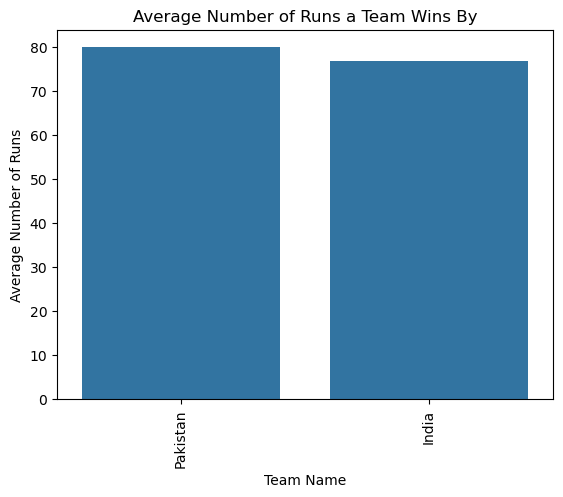

In [17]:
WinByRuns = cricketData[(cricketData['WinByRuns'] > 0) & (cricketData['Winner'].isin(['India', 'Pakistan']))]
AvgWinRuns = WinByRuns.groupby('Winner')['WinByRuns'].mean().sort_values(ascending=False).to_dict()
sns.barplot(x= AvgWinRuns.keys(), y = AvgWinRuns.values())
plt.xlabel('Team Name')
plt.ylabel('Average Number of Runs')
plt.title('Average Number of Runs a Team Wins By')
plt.xticks(rotation=90)
plt.show()

**Question 15** We want to see who has been the most impactful player for Pakistan over the years. First find the list of players who have been awarded the man of the match and the amount of times they have been awareded. Store this in a dictionary called `PakManOfMatchCount`.

Keep in mind how usually the winning team is awarded the man of the match.

Also comment on whether simply checking which player has won the most man of the match awards is a good insight into who has been the best player of Pakistan? Make sure you are able to justify whatever claim you make.

In [18]:
PakManOfMatchCount = cricketData[cricketData['Winner'] == 'Pakistan']['PlayerOfMatch'].value_counts().to_dict()
PakManOfMatchCount

# No because it is not the only criteria to judge a player being best while there are other things we have to check like strike rate, overall average runs, how many times the team won the match with the help of that best player etc...

{' Shahid Afridi': 12,
 ' Shoaib Malik': 11,
 ' Mohammad Hafeez': 11,
 ' Babar Azam': 10,
 ' Abdul Razzaq': 9,
 ' Younis Khan': 8,
 ' Umar Akmal': 7,
 ' Fakhar Zaman': 6,
 ' Mohammad Yousuf': 6,
 ' Salman Butt': 5,
 ' Ahmed Shehzad': 5,
 ' Sarfraz Ahmed': 4,
 ' Misbah-ul-Haq': 4,
 ' Yasir Hameed': 4,
 ' Kamran Akmal': 3,
 ' Nasir Jamshed': 3,
 ' Sohail Tanvir': 3,
 ' Naved-ul-Hasan': 3,
 ' Shadab Khan': 3,
 ' Imam-ul-Haq': 3,
 ' Hasan Ali': 2,
 ' Usman Shinwari': 2,
 ' Naseem Shah': 2,
 ' Mohammad Nawaz (3)': 2,
 ' Mohammad Sami': 2,
 ' Haris Rauf': 2,
 ' Shaheen Shah Afridi': 2,
 ' Inzamam-ul-Haq': 2,
 ' SR Tendulkar': 1,
 ' Mohammad Asif': 1,
 ' Imran Farhat': 1,
 ' Abdur Rauf': 1,
 ' CH Gayle': 1,
 ' Imran Nazir': 1,
 ' Shoaib Akhtar': 1,
 ' KC Sangakkara': 1,
 ' Taufeeq Umar': 1,
 ' MN Samuels': 1,
 ' Umar Gul': 1,
 ' Nasir Hossain': 1,
 ' Aizaz Cheema': 1,
 ' MS Dhoni': 1,
 ' Mohammad Irfan': 1,
 ' Anwar Ali': 1,
 ' Sohaib Maqsood': 1,
 ' Wahab Riaz': 1,
 ' Azhar Ali': 1,
 ' Fahee


**Question 16** For all seasons, find the player that has been the most frequent Man of the match for Pakistan. There might be people with the same number of wins, in that case give sequential preference. Store in a dictionary, where key is season and value is the name of the player.

In [19]:
PakWins = cricketData[cricketData['Winner'] == "Pakistan"]
MomCounts = PakWins.groupby(['Season', 'PlayerOfMatch']).size().reset_index(name='Count')

PakManOfMatchSeason = MomCounts.sort_values(['Season', 'Count'], ascending=[True, False])\
                              .drop_duplicates('Season')\
                              .set_index('Season')['PlayerOfMatch'].to_dict()
PakManOfMatchSeason

{2003: ' Mohammad Hafeez',
 2004: ' Mohammad Sami',
 2005: ' Abdul Razzaq',
 2006: ' Younis Khan',
 2007: ' Naved-ul-Hasan',
 2008: ' Salman Butt',
 2009: ' CH Gayle',
 2010: ' Abdul Razzaq',
 2011: ' Mohammad Hafeez',
 2012: ' Shahid Afridi',
 2013: ' Misbah-ul-Haq',
 2014: ' Mohammad Hafeez',
 2015: ' Ahmed Shehzad',
 2016: ' Mohammad Hafeez',
 2017: ' Babar Azam',
 2018: ' Fakhar Zaman',
 2019: ' Mohammad Hafeez',
 2020: ' Abid Ali',
 2021: ' Babar Azam',
 2022: ' Babar Azam',
 2023: ' Babar Azam'}

**Question 17** Lets now analyze more recent performance of the teams. For the last 3 seasons, plot the distribution of `WinByRuns` for the top 10 teams with most wins. For each time, overlay the distribution of each season on the same plot. Comment on what you observe.

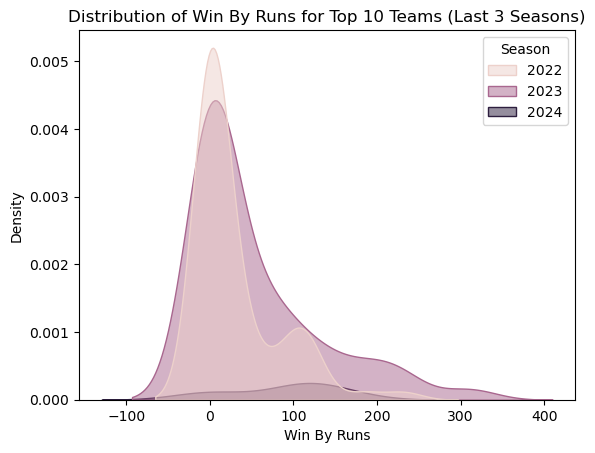

In [20]:
last_3_seasons = cricketData[cricketData['Season'].isin(sorted(cricketData['Season'].unique())[-3:])]
top_10_teams = last_3_seasons['Winner'].value_counts().head(10).index
top_10_data = last_3_seasons[last_3_seasons['Winner'].isin(top_10_teams)]
sns.kdeplot(data=top_10_data, x='WinByRuns', hue='Season', fill=True, alpha=0.5)
plt.title("Distribution of Win By Runs for Top 10 Teams (Last 3 Seasons)")
plt.xlabel("Win By Runs")
plt.ylabel("Density")
plt.show()

# The distribution is somehow right skewed for last 3 seasons for top 10 teams while there is a large dispersion in win by runs for 2023 as compared to other two seasons.

**Question 18** Similarly, for all seasons, find the team that Pakistan has defeated the most frequently. Store your results in a dictionary called `mostDefeatedTeam`, where key is the season and the team name is value.

In [21]:
pakWins = cricketData[cricketData['Winner'] == 'Pakistan'].copy()
pakWins['LosingTeam'] = pakWins.apply(lambda x: x['Team1'] if x['Team2'] == 'Pakistan' else x['Team2'], axis=1)
mostDefeatedTeam = pakWins.groupby(['Season', 'LosingTeam']).size().groupby(level=0).idxmax().apply(lambda x: x[1]).to_dict()
mostDefeatedTeam

{2003: 'Bangladesh',
 2004: 'India',
 2005: 'West Indies',
 2006: 'England',
 2007: 'West Indies',
 2008: 'Bangladesh',
 2009: 'Sri Lanka',
 2010: 'England',
 2011: 'West Indies',
 2012: 'Bangladesh',
 2013: 'West Indies',
 2014: 'South Africa',
 2015: 'Zimbabwe',
 2016: 'England',
 2017: 'West Indies',
 2018: 'Zimbabwe',
 2019: 'South Africa',
 2020: 'Sri Lanka',
 2021: 'South Africa',
 2022: 'Netherlands',
 2023: 'New Zealand'}

**Question 19** What further insightful analysis or questions do you think could be useful in extracting some valuable information from the dataset?

**Answer**: Players strike rate, how many times a team has won the match with the score of best player of the match, The team performances on the home ground as compared to other grounds etc...